### Tibet lakes volume change by Zhang et al.(2021)
?? 1. Zhang et al.(2021) divide the lake into glacier-fed and non-glacier-fed lake, but not mentioned how to classify the two categories.

In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from utils.scatter_plot import scatter_plot


In [13]:
path_tibet_boundary = 'data/basins/tibet_basins_zhang.gpkg'
path_lakes = 'data/lakes/TP_lakeVolumeChange_1970_2020_v20220408/TP_lakeVolumeChange_1970_2020_v20220408.gpkg'
path_hybas_basins = 'data/basins/asia_Lehner2013_levels/hybas_as_lev06_v1c.gpkg'


In [14]:
### read in data
tibet = gpd.read_file(path_tibet_boundary)
tibet_lakes = gpd.read_file(path_lakes)
hydro_basins_asia = gpd.read_file(path_hybas_basins)
print('Number of lakes:', tibet_lakes.shape[0])
tibet_lakes.head(2)


Number of lakes: 1132


,Code,AREA_GEO,Source,Date,Endorheic,Exorheic,G_fed,Non_G_fed,v1970_1991,v1990_1996,...,v2010_2016,v2015_2021,E1970_1990,E1990_1995,E1995_2000,E2000_2005,E2005_2010,E2010_2015,E2015_2020,geometry
0,L1,4375.935379,p133r034_lc820150913,2015/09/13,1,0,1,0,-9.225572,-2.133910,...,7.654725,11.691358,3.177778,3.122236,3.104039,3.093761,1.030991,3.140217,3.241841,"MULTIPOLYGON (((100.36713 36.65749, 100.36774 ..."
1,L100,121.509745,p146r036_lc820151010,2015/10/10,1,0,1,0,0.006796,-0.063231,...,0.139842,0.071328,0.185823,0.185121,0.186599,0.190289,0.064256,0.195508,0.198024,"MULTIPOLYGON (((79.82250 34.17814, 79.82282 34..."


Text(0.5, 1.0, 'Distribution of lakes')

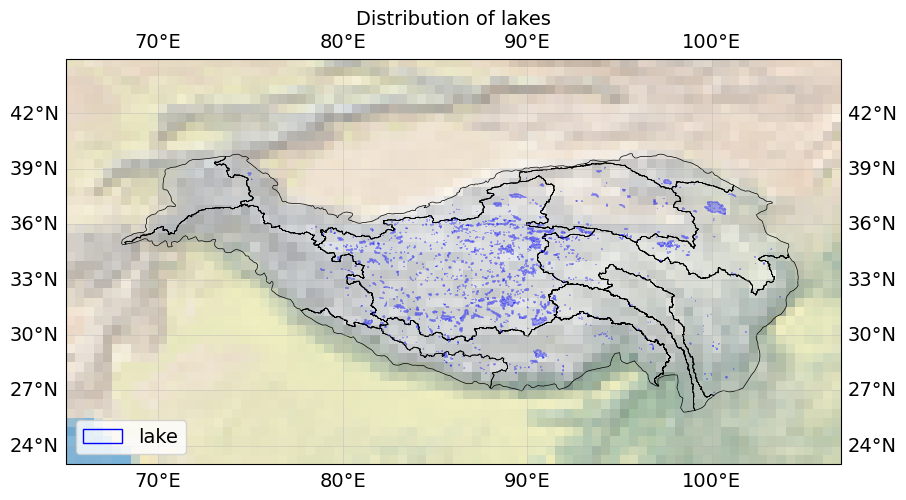

In [15]:
## Lakes
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 23.0, 43.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
# hydro_basins_asia.plot(ax=ax, edgecolor='orange', facecolor='none', linestyle='-', linewidth=0.4)
tibet.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
tibet_lakes.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=0.5, alpha=0.3)
ax.stock_img()
legend_patches = [
    mpatches.Patch(edgecolor='blue', facecolor='none', label='lake')]
ax.legend(handles=legend_patches, loc='lower left')
ax.set_title('Distribution of lakes', fontsize=14)
# plt.savefig('figures/hma_lakes.png', bbox_inches='tight', dpi=100)


In [16]:
## Endorheic Lakes
tibet_lakes_endorheic = tibet_lakes[tibet_lakes['Endorheic'] == 1]
tibet_lakes_exorheic = tibet_lakes[tibet_lakes['Exorheic'] == 1]
print('Number of endorheic lakes:',tibet_lakes_endorheic.shape[0])
print('Number of exorheic lakes:',tibet_lakes_exorheic.shape[0])


Number of endorheic lakes: 379
Number of exorheic lakes: 752


Text(0.5, 1.0, 'Distribution of lakes')

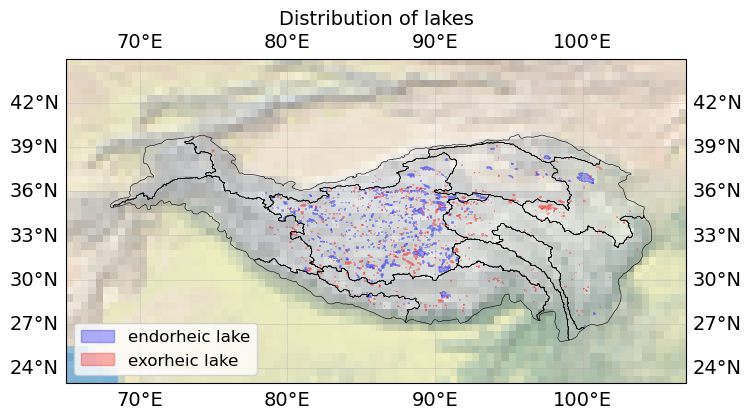

In [17]:
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 23.0, 43.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
tibet_lakes_endorheic.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=0.5, alpha=0.3)
tibet_lakes_exorheic.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=0.5, alpha=0.3)
tibet.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.4)
ax.stock_img()
legend_patches = [
    mpatches.Patch(edgecolor='blue', facecolor='blue', alpha=0.3, label='endorheic lake'),
    mpatches.Patch(edgecolor='red', facecolor='red', alpha=0.3, label='exorheic lake')]
ax.legend(handles=legend_patches, loc='lower left', fontsize=12)
ax.set_title('Distribution of lakes', fontsize=14)
# plt.savefig('figures/hma_lakes.png', bbox_inches='tight', dpi=100)



Text(0.5, 1.0, 'lakes elevation change')

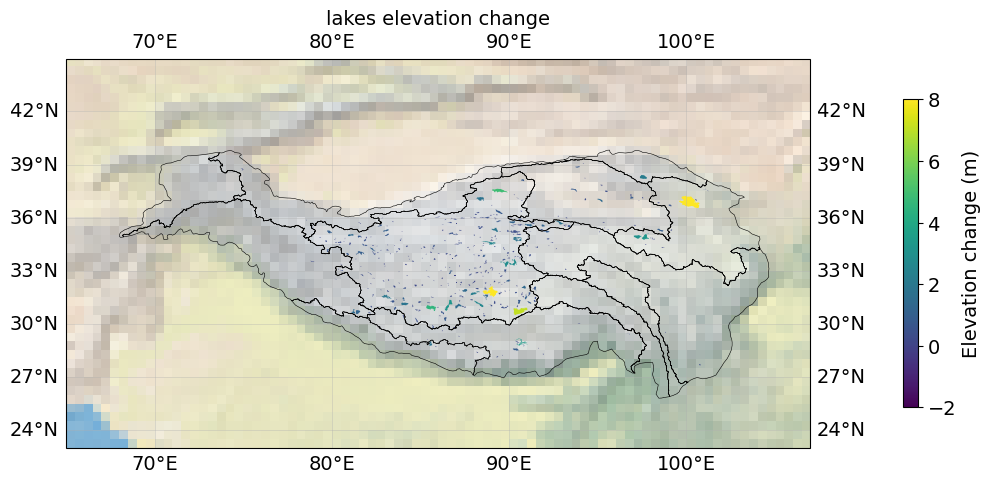

In [18]:
tibet_lakes['E2000_2020'] = tibet_lakes[['E2000_2005', 'E2005_2010', 'E2010_2015', 'E2015_2020']].sum(axis=1)
tibet_lakes['v2000_2021'] = tibet_lakes[['v2000_2006', 'v2005_2011', 'v2010_2016', 'v2015_2021']].sum(axis=1)
tibet_lakes_le10 = tibet_lakes[tibet_lakes['AREA_GEO'] > 10]
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 23.0, 43.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax_ele_change = tibet_lakes_le10.plot(ax=ax, column='E2000_2020', cmap='viridis', \
                                      vmin=-2, vmax=8,
                                      legend=True, legend_kwds={'label': "Elevation change (m)", 
                                                                'shrink': 0.5, 'pad':0.1, 
                                                                'fraction':0.1})
tibet.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.4)
ax.stock_img()
ax.set_title('lakes elevation change', fontsize=14)


#### Statistic of the lakes area and lakes number of each region.

In [19]:
tibet_lakes_end = tibet_lakes[tibet_lakes['Endorheic'] == 1]
tibet_lakes_exor = tibet_lakes[tibet_lakes['Exorheic'] == 1]


In [20]:
area_end = tibet_lakes_endorheic['AREA_GEO'].sum()
area_exor = tibet_lakes_exorheic['AREA_GEO'].sum()
lakes_end_ele_change_radio=tibet_lakes_end['v2000_2021'].sum()/area_end
lakes_exor_ele_change_radio=tibet_lakes_exor['v2000_2021'].sum()/area_exor
print('Elevation change of endorheic lake for 1 km2:', lakes_end_ele_change_radio*1000)    ### unit: mm/km2
print('Elevation change of exorheic lake for 1 km2:', lakes_exor_ele_change_radio*1000)  


Elevation change of endorheic lake for 1 km2: 4.8429163718199915
Elevation change of exorheic lake for 1 km2: 0.9301421499982623


In [22]:
tibet_lakes_gla_fed = tibet_lakes[tibet_lakes['G_fed'] == 1]
tibet_lakes_non_gla_fed = tibet_lakes[tibet_lakes['Non_G_fed'] == 1]


In [ ]:
area_gla_fed = tibet_lakes_gla_fed['AREA_GEO'].sum()
area_non_gla_fed = tibet_lakes_non_gla_fed['AREA_GEO'].sum()
lakes_gla_fed_ele_change_radio=tibet_lakes_end['v2000_2021'].sum()/area_gla_fed
lakes_non_gla_fed_ele_change_radio=tibet_lakes_exor['v2000_2021'].sum()/area_non_gla_fed
print('Elevation change of endorheic lake for 1 km2:', lakes_gla_fed_ele_change_radio*1000)    ### unit: mm/km2
print('Elevation change of exorheic lake for 1 km2:', lakes_non_gla_fed_ele_change_radio*1000)  


Elevation change of endorheic lake for 1 km2: 5.0178902091863105
Elevation change of exorheic lake for 1 km2: 0.8353094175779749


163.67470213626